In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/accident data.csv')

In [ ]:
unneeded_columns = ['Index','District Area','Longitude']
data = data.drop(unneeded_columns, axis=1)

In [ ]:
data['Accident_Severity'] = data['Accident_Severity'].replace(['Serious'],'Fatal')

In [ ]:
data.drop(data[data['Urban_or_Rural_Area'] == 'Unallocated'].index, inplace = True)

In [ ]:
data.columns = data.columns.str.replace(' ','_')

In [ ]:
cat_columns =['Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']

In [ ]:
for i in range(len(cat_columns)):
  data[cat_columns[i]].replace(' ','_',regex=True, inplace=True)


In [ ]:
data.isna().sum()

Accident_Severity              0
Accident_Date                  0
Latitude                      17
Light_Conditions               0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [ ]:
data = data.dropna(axis=0).reset_index(drop=True)

In [ ]:
def get_years(df, column):
    return df[column].apply(lambda date: date[-4:])

def get_months(df, column):
    return df[column].apply(lambda date: date[3:5])

In [ ]:
data['Month'] = get_months(data, 'Accident_Date')
data['Year'] = get_years(data, 'Accident_Date')

data = data.drop(['Accident_Date'], axis=1)

In [ ]:
label_encoder = preprocessing.LabelEncoder()

data['Accident_Severity']=label_encoder.fit_transform(data["Accident_Severity"])
data['Accident_Severity'] = data['Accident_Severity']
data['Accident_Severity'].unique()

array([0, 1])

In [ ]:
data['Month'] = pd.to_numeric(data['Month'])
data['Year'] = pd.to_numeric(data['Year'])

In [ ]:
new_data = pd.get_dummies(data, columns = ['Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type','Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type'])

In [ ]:
x = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [ ]:
new_data.shape

(642794, 47)

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

bestfeature = SelectKBest(score_func=chi2, k=10)
bf = bestfeature.fit(x,y)

In [ ]:
score = pd.DataFrame(bf.scores_)
colnames = pd.DataFrame(x.columns)
bf_result = pd.concat([colnames, score], axis='columns')
bf_result.columns = ['Feature','Score']
bf_result.nlargest(10,'Score')

,Feature,Score
33,Vehicle_Type_Car,26430.163519
32,Vehicle_Type_Bus_or_coach_(17_or_more_pass_seats),1371.502755
41,Vehicle_Type_Motorcycle_over_500cc,1362.938022
35,Vehicle_Type_Goods_7.5_tonnes_mgw_and_over,919.590388
38,Vehicle_Type_Motorcycle_125cc_and_under,809.885442
45,Vehicle_Type_Taxi/Private_hire_car,705.690292
40,Vehicle_Type_Motorcycle_over_125cc_and_up_to_5...,406.961161
39,Vehicle_Type_Motorcycle_50cc_and_under,404.888168
36,Vehicle_Type_Goods_over_3.5t._and_under_7.5t,323.877803
42,Vehicle_Type_Other_vehicle,297.256215


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([1.11868270e-03, 1.57293837e-02, 2.64482519e-03, 2.88094907e-03,
       5.75695507e-03, 3.11889636e-03, 1.81295440e-04, 5.94343216e-04,
       1.35044543e-04, 4.19867643e-04, 7.06154479e-04, 5.37147147e-04,
       7.31211010e-05, 3.09009148e-04, 1.58907465e-04, 5.70538157e-04,
       6.52987782e-04, 2.55459581e-04, 4.43757281e-04, 6.92089111e-04,
       2.30821881e-04, 5.20329596e-04, 5.19464323e-04, 2.24645092e-04,
       5.21511608e-04, 1.77494025e-04, 3.20176964e-04, 2.40579097e-04,
       3.89050688e-04, 5.69283029e-05, 1.71555406e-04, 1.80421185e-02,
       9.16022581e-02, 3.30477330e-01, 7.78072930e-05, 7.11905382e-02,
       4.58866388e-02, 1.77177569e-02, 6.63318093e-02, 5.36479072e-02,
       3.79448820e-02, 1.00811669e-01, 4.40959842e-02, 2.36246263e-03,
       6.43794495e-05, 7.93944869e-02])

<Axes: >

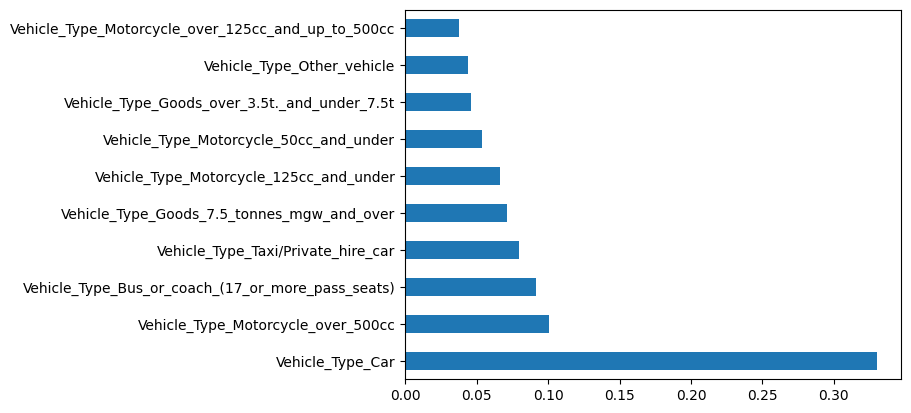

In [ ]:
rf_feature = pd.Series(rf.feature_importances_, index=x.columns)
rf_feature.nlargest(10).plot(kind='barh')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cor_matrix = new_data.corr()
top_corr_feature = cor_matrix.index

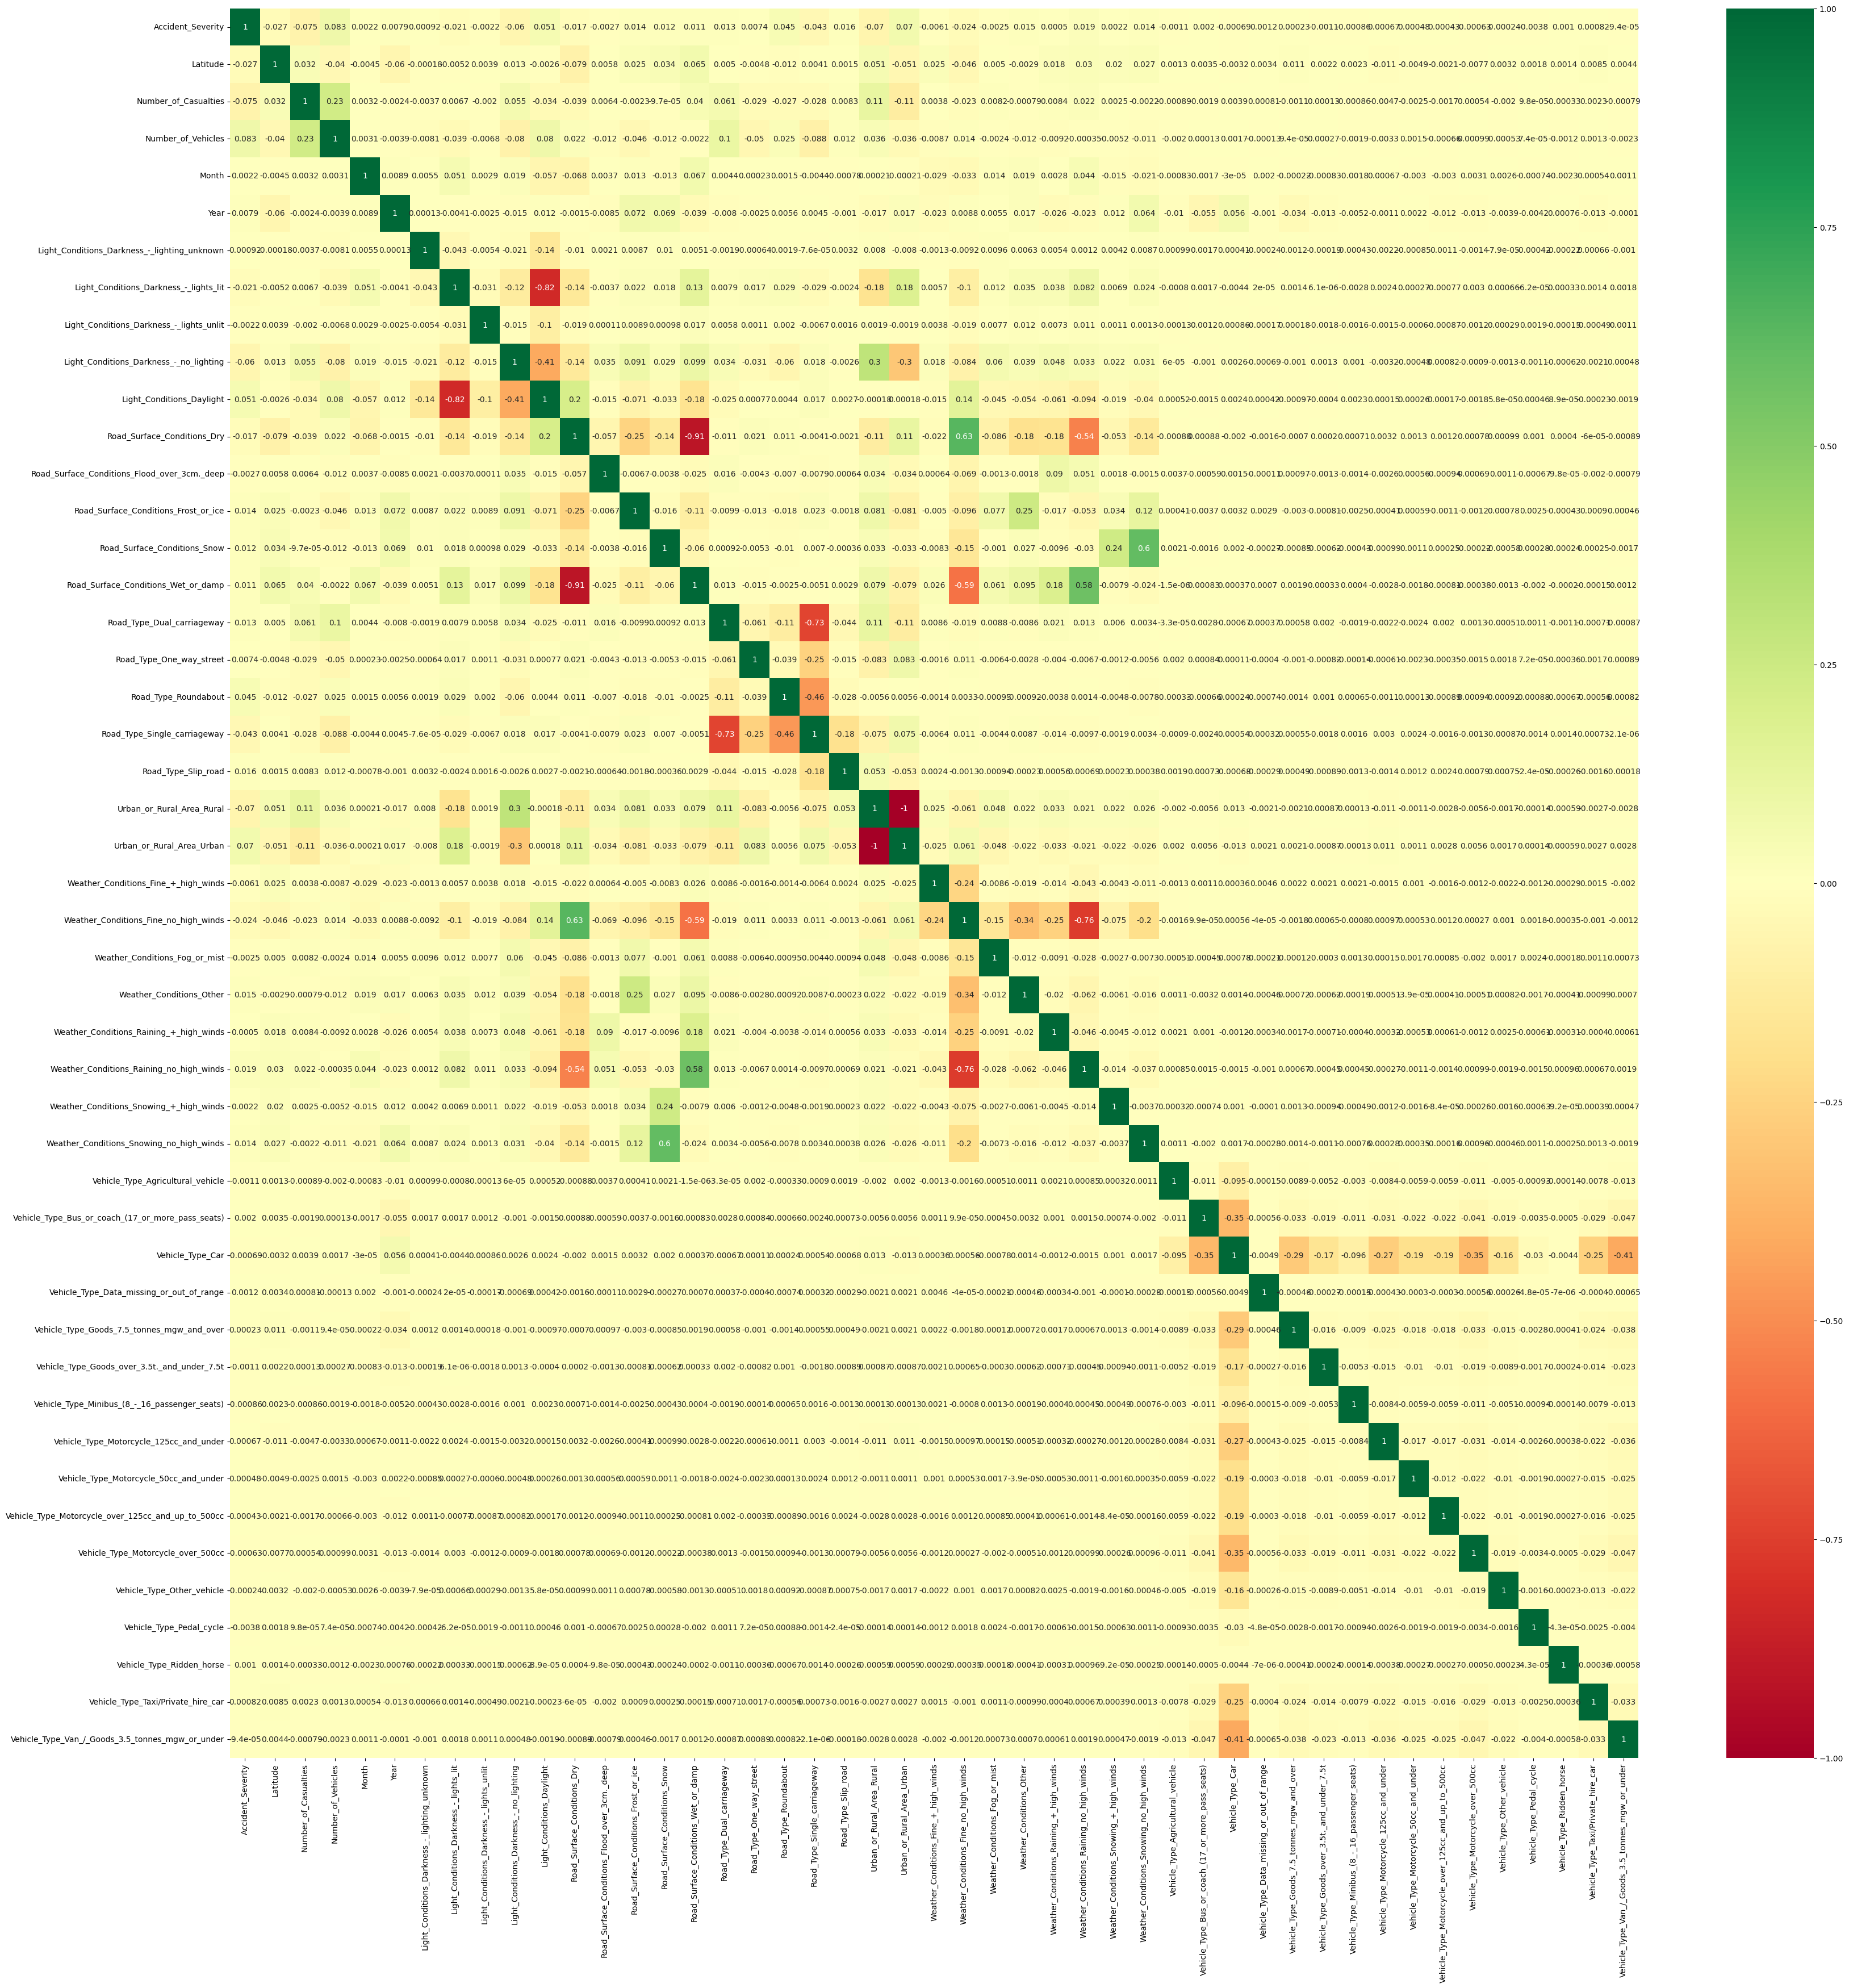

In [ ]:
plt.figure(figsize=(40,40))
g = sns.heatmap(new_data[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

In [ ]:
accidents = pd.read_csv('/content/drive/MyDrive/accident data.csv')

In [ ]:
accidents.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-30-9f7695a3874f>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  left = plt.subplot(grid_layout[0,0])


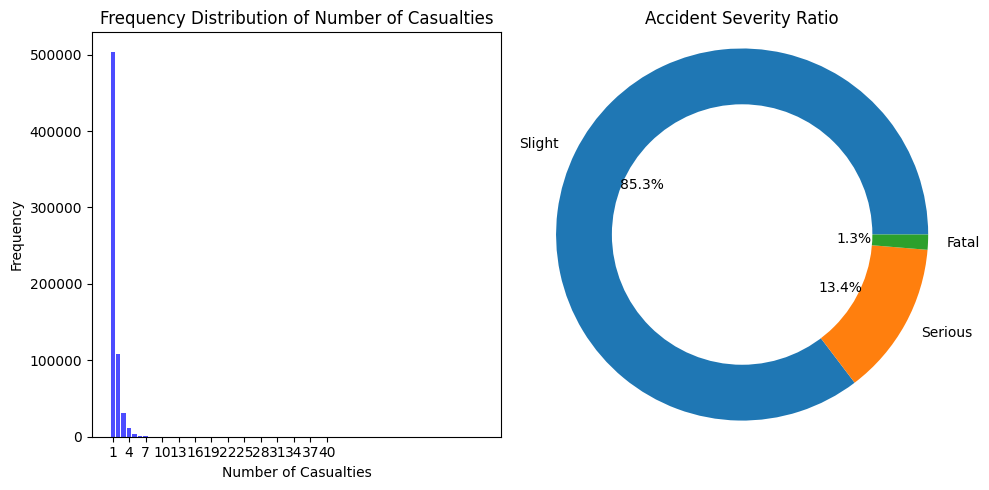

In [ ]:
import matplotlib.gridspec as gs

# make figure
fig=plt.figure(figsize=(10,5))

# add grid axes
ax = plt.gca()
grid_layout = gs.GridSpec(ncols=2, nrows=1, figure=fig)
left = plt.subplot(grid_layout[0,0])
right = plt.subplot(grid_layout[0,1])

# draw distribution of number of casualties
casualty_count = accidents.Number_of_Casualties.value_counts()
left.bar(x=casualty_count.index, height=casualty_count.values, color="blue", alpha= 0.7)
left.set_xticks(np.arange(1,42,3))
left.set_xlabel("Number of Casualties")
left.set_ylabel("Frequency")
left.set_title("Frequency Distribution of Number of Casualties")

# plot pie chart of accident severity percents
severity_ratio = accidents.Accident_Severity.value_counts()
severity_ratio.plot.pie(autopct="%.1f%%", ax=right)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
right.axis('equal')
right.set_title("Accident Severity Ratio")
right.set_ylabel("")
plt.tight_layout()

In [ ]:
accidents['Date']= pd.to_datetime(accidents['Accident Date'], format="%d-%m-%Y")

**Accidents on Monthly count**

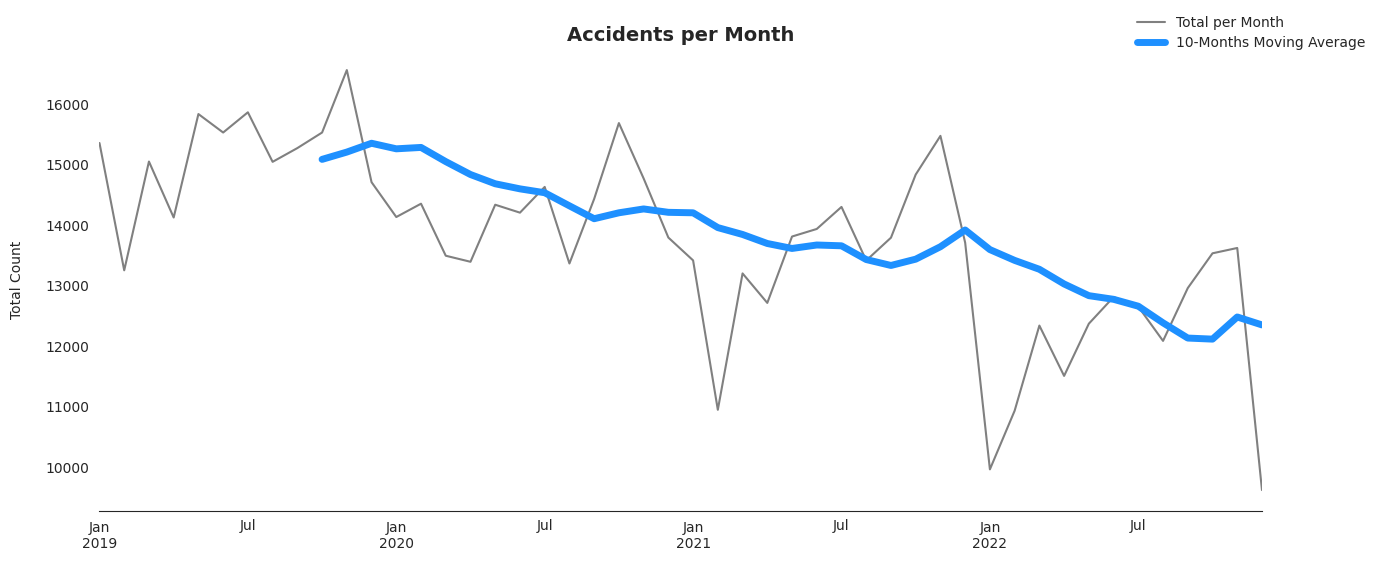

In [ ]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='dodgerblue', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

**Accidents on yearly counts**

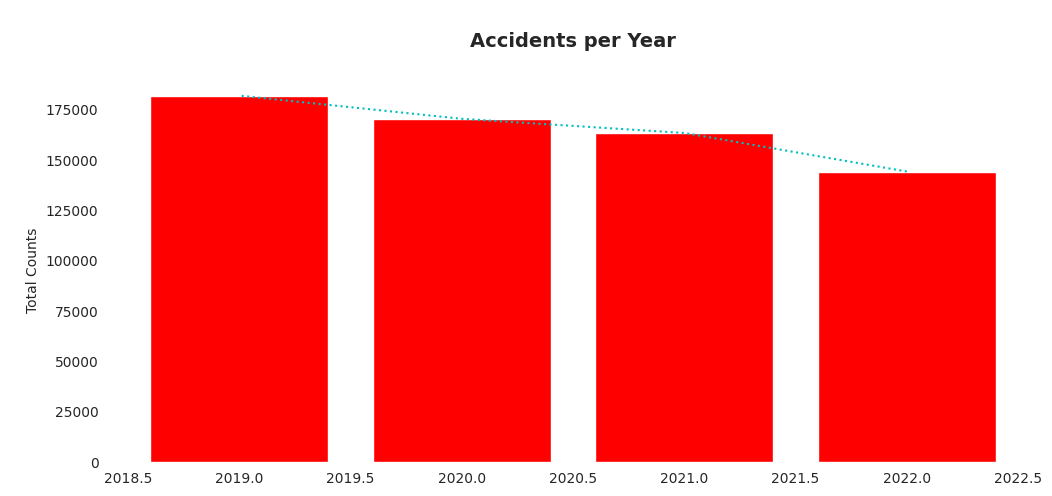

In [ ]:
yearly_count = accidents['Date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='red')
ax.plot(yearly_count, linestyle=':', color='c')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

**Accidents According to weather**

In [ ]:
accidents.Weather_Conditions.value_counts(normalize=True)

Weather_Conditions
Fine no high winds       0.805636
Raining no high winds    0.123263
Other                    0.026525
Raining + high winds     0.014871
Fine + high winds        0.013230
Snowing no high winds    0.009648
Fog or mist              0.005457
Snowing + high winds     0.001369
Name: proportion, dtype: float64

'Fine no high winds weather' condition corelates with more number of accidents

---



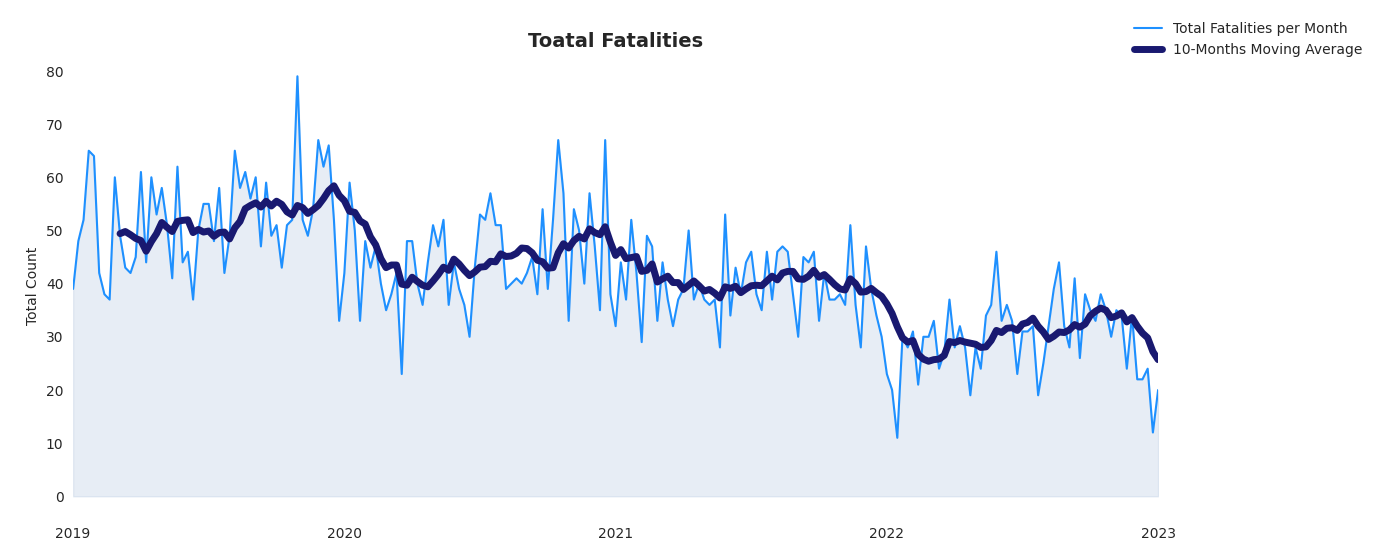

In [ ]:
# set the criterium to slice the fatalaties
criteria = accidents['Accident_Severity']=='Fatal'
# create a new dataframe
weekly_fatalities = accidents.loc[criteria].set_index('Date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='dodgerblue', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='lightsteelblue', alpha=0.3)
weekly_fatalities.rolling(window=10).mean()\
                                          .plot(color='midnightblue', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('\nToatal Fatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [ ]:
district_top_10 = pd.DataFrame(accidents['District Area'].value_counts()).sort_values('District Area', ascending = False)[:10].reset_index()
district_top_10 = district_top_10.rename(columns={'index': 'city', 'District Area': 'accidents'})
district_top_10

,accidents,count
0,York,1897
1,Wyre Forest,969
2,Wyre,1238
3,Wycombe,1729
4,Wychavon,1361
5,Wrexham,1302
6,Worthing,1008
7,Worcester,858
8,Wolverhampton,2466
9,Wokingham,1310


In [ ]:
accidents.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Date
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019-06-05
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019-07-02
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,2019-08-26
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019-08-16
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,2019-09-03


In [ ]:
accidents['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

In [ ]:
junction_detail_names={'Single carriageway','Dual carriageway','Roundabout','One way street','Slip road'}

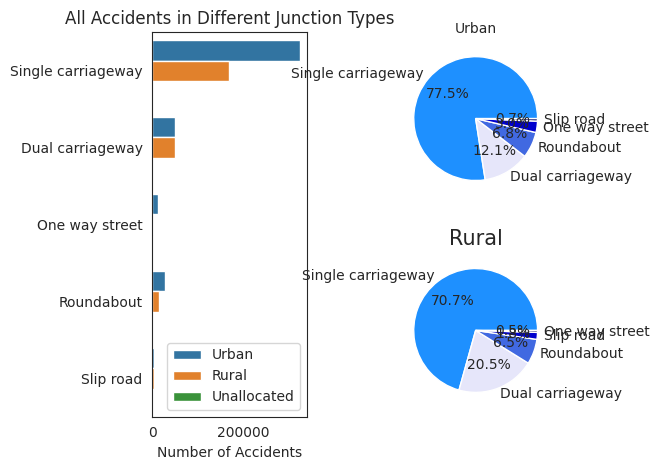

In [ ]:
# make grids
grid_layout = gs.GridSpec(2,2)
left = plt.subplot(grid_layout[:,0])
right_top = plt.subplot(grid_layout[0, 1])
right_bottom = plt.subplot(grid_layout[1, 1])

# make horizontal countplot
sns.countplot(y="Road_Type", hue="Urban_or_Rural_Area", ax=left,\
              data=accidents)
left.set_xlabel("Number of Accidents")
left.set_ylabel("")
left.set_title("All Accidents in Different Junction Types")
left.legend(loc="lower right")

# plot upper right pie
data = accidents[accidents.Urban_or_Rural_Area=="Urban"].Road_Type
data = data.replace(junction_detail_names).value_counts()
data.plot.pie(autopct="%.1f%%", ax=right_top,\
              colors=["dodgerblue", "lavender", "royalblue", "mediumblue", "midnightblue", "cornflowerblue"])
right_top.set_ylabel("")
right_top.set_title("Urban", fontsize=10)

# plot lower right pie
data = accidents[accidents.Urban_or_Rural_Area=="Rural"].Road_Type
data = data.replace(junction_detail_names).value_counts()
data.plot.pie(autopct="%.1f%%", ax=right_bottom,\
              colors=["dodgerblue", "lavender", "royalblue", "mediumblue", "midnightblue", "cornflowerblue"])
right_bottom.set_ylabel("")
right_bottom.set_title("Rural", fontsize=15)

plt.tight_layout()

Single Carriageway directly related to more number of accidents in both rural and urban areas.

---



**Visualization of the accidents on a map**

In [ ]:
import folium

In [ ]:
df = accidents.dropna(subset = ['Latitude' , 'Longitude'])
display(df.Latitude.isna().sum())
display(df.Longitude.isna().sum())

0

0

In [ ]:
df.Latitude = pd.to_numeric(df.Latitude)
df.Longitude = pd.to_numeric(df.Longitude)

<ipython-input-43-f8b12eecdaa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Latitude = pd.to_numeric(df.Latitude)
<ipython-input-43-f8b12eecdaa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Longitude = pd.to_numeric(df.Longitude)


In [ ]:
x_mean = df.Latitude.mean()
y_mean = df.Longitude.mean()

In [ ]:
df[['Latitude','Longitude']].min().tolist()

[49.91443, -7.516225]

In [ ]:
df_min = df[['Latitude','Longitude']].min().tolist()
df_max = df[['Latitude','Longitude']].max().tolist()

df_x_min = df[df['Latitude'] == df_min[0]][['Latitude','Longitude']].to_records()[0]
df_x_min = [df_x_min[1], df_x_min[2]]

df_y_min = df[df['Longitude'] == df_min[1]][['Latitude','Longitude']].to_records()[0]
df_y_min = [df_y_min[1], df_y_min[2]]


df_x_max = df[df['Latitude'] == df_max[0]][['Latitude','Longitude']].to_records()[0]
df_x_max = [df_x_max[1], df_x_max[2]]

df_y_max = df[df['Longitude'] == df_max[1]][['Latitude','Longitude']].to_records()[0]
df_y_max = [df_y_max[1], df_y_max[2]]

In [ ]:
# Uses lat then lon. The bigger the zoom number, the closer in you get
map_acc = folium.Map(location=[x_mean,y_mean],
                    zoom_start = 4.3)
folium.Marker(df_x_min, popup='Min X').add_to(map_acc)
folium.Marker(df_y_min, popup='Min Y').add_to(map_acc)
folium.Marker(df_x_max, popup='Max X').add_to(map_acc)
folium.Marker(df_y_max, popup='Max Y').add_to(map_acc)

rec = [df_x_min,df_y_min,df_x_max,df_y_max]
# create a polygon with the coordinates
folium.Polygon(rec,
               color="blue",
               weight=.1,
               fill=True,
               fill_color="orange",
               fill_opacity=0.2).add_to(map_acc)

map_acc # Calls the map to display

In [ ]:
most_crashes = df[['Latitude','Longitude']].value_counts().head(1000)
most_crashes_df = most_crashes.reset_index()
max_accidents = most_crashes_df.iloc[0].max()
# Uses lat then lon. The bigger the zoom number, the closer in you get
map = folium.Map(location=[x_mean,y_mean],
                    zoom_start = 7)

for key,value in most_crashes.items():
    point = [key[0],key[1]]
    radius_val = ((value / max_accidents) ** 2) * 6

    folium.CircleMarker(point
                    ,radius=radius_val
                    ,color="blue"
                    ,weight= value/max_accidents
                    ,fill=True
                    ,fill_color="red"
                    ,fill_opacity=1
                    ,popup=f'{value} Accidents Occured'
                   ).add_to(map)
map # Calls the map to display